In [1]:
%load_ext autoreload
%autoreload 2   

In [2]:
import asyncio

from qdm.server.comms import sys_query


In [300]:
await sys_query(cmd='stop_meas_now')

{'response': 'TimeoutError for command None'}


 ## Setting Attributes

In [301]:
await sys_query(dev='cam', cmd='set_trigger_mode', args=["int"],)
await sys_query(dev='cam', cmd='set_exposure', args=[0.1])
await sys_query(dev='cam', cmd='set_attr', attr="SensorCooling", args=[True])
response = await sys_query(dev='cam', cmd='get_data_size')
img_size = response['data']

## Getting Attributes

In [302]:
cam_attrs = await sys_query(dev='cam', cmd='get_all_attr')

# cam_attrs = await sys_query('cam get_all_attr')
print(json.dumps(cam_attrs, indent=4))


{
    "AccumulateCount": 1,
    "AOIHBin": 1,
    "AOIHeight": 2048,
    "AOILeft": 1,
    "AOIStride": 4096,
    "AOITop": 1,
    "AOIVBin": 1,
    "AOIWidth": 2048,
    "Baseline": 100,
    "ExposedPixelHeight": 10417,
    "FrameCount": 1,
    "ImageSizeBytes": 8388608,
    "SensorHeight": 2048,
    "SensorWidth": 2048,
    "TimestampClock": 3472191944143,
    "TimestampClockFrequency": 40000000,
    "AlternatingReadoutDirection": false,
    "CameraAcquiring": false,
    "CameraPresent": true,
    "EventEnable": true,
    "FastAOIFrameRateEnable": false,
    "FullAOIControl": true,
    "IOInvert": false,
    "MetadataEnable": false,
    "MetadataFrame": true,
    "MetadataFrameInfo": true,
    "MetadataTimestamp": true,
    "Overlap": false,
    "RollingShutterGlobalClear": false,
    "ScanSpeedControlEnable": false,
    "SensorCooling": true,
    "SpuriousNoiseFilter": true,
    "StaticBlemishCorrection": true,
    "VerticallyCentreAOI": false,
    "BytesPerPixel": 2.0,
    "Exposur

## Camera images and videos

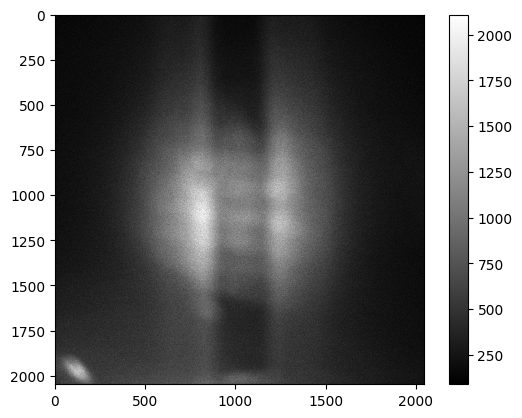

{'error': None, 'response': 'set attr'}

In [303]:
await sys_query(dev='SYS', cmd='laser_output', args=[1])
await sys_query(dev='cam', cmd='set_trigger_mode', args=["int"])
await sys_query(dev='cam', cmd='set_exposure', args=[0.1])
image = await sys_query(dev='cam', cmd='get_frame', kwargs={"num_frames": 1})


# await sys_query({"device": "SYS", "command": "laser_output", "args": [1]})
# await sys_query({"device": "cam", "command": "set_trigger_mode", "args": ["int"]})
# await sys_query({"device": "cam", "command": "set_exposure", "args": [0.1]})
# image = await sys_query({"device": "cam", "command": "get_frame", "kwargs": {"num_frames": 1}})

plt.figure()
plt.imshow(image.reshape((img_size[0], img_size[1])), cmap='gray', interpolation='none')
plt.colorbar()
plt.show()
await sys_query(dev='SYS', cmd='laser_output', args=[0])


In [243]:
await sys_query(dev='SYS', cmd='laser_output', args=[1])

time_trace = await sys_query(dev='cam', cmd='video')

await sys_query(dev='SYS', cmd='laser_output', args=[0])



{'error': None, 'response': 'set attr'}

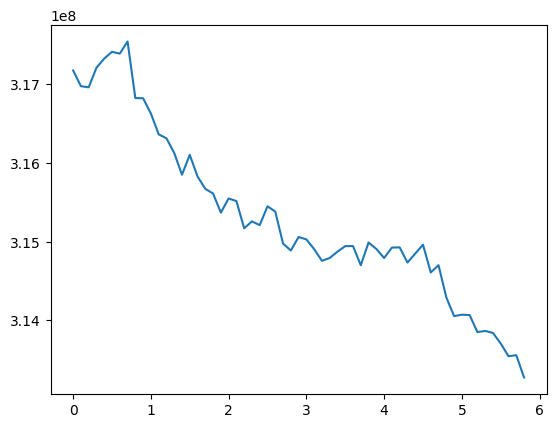

In [244]:
plt.figure()
plt.plot(time_trace["time"], time_trace["intensity"])

# Measurements

In [304]:
# prepare the rf generator
await sys_query(dev='rf', cmd='set_attr', attr='freq', args=[2870])
await sys_query(dev='rf', cmd='set_attr', attr='power', args=[-30])

await sys_query(dev='rf', cmd='set_attr', attr='output', args=[1])


'set_attr'

In [3]:
# prepare the camera
await sys_query(dev='cam', cmd='set_trigger_mode', args=["int"])
await sys_query(dev='cam', cmd='set_exposure', args=[0.2])
await sys_query(dev='cam', cmd='set_image_size', args=[(512, 512)])
await sys_query(dev='cam', cmd='set_bin', args=[1])

# await sys_query({"device": "cam", "command": "set_image_size", "args": [(512, 512)]})
# await sys_query({"device": "cam", "command": "set_bin", "args": [1]})
# await sys_query({"device": "cam", "command": "set_exposure", "args": [0.2]})


{'response': 'TimeoutError for command set_bin'}

In [4]:
from qdm.measurements.esr_server import ESR
# create an object of the ODMR measurement
odmr = ESR(
            int_time = 20e-3,
            avg_per_point = 4,
            freq_center= 2769,
            freq_range = 60,
            freq_num = 11,
            power = -30,
            esr_type= "cw",
            ref_bool = True,
            ref_type = "no_rf") 

In [6]:
await odmr.start()

  0%|          | 0/1 [00:00<?, ?it/s]